In [1]:
import pandas as pd

filepath = "final-Sentiment-analysis.csv"

df = pd.read_csv(filepath)
df.head()

,reviews,category or product name,updated-by,reference link,sentiment
0,இந்த புத்தகம் உண்மையில் அதிக கவலை பிரச்சனை உள்...,Emotional Intelligence (Tamil),priya,https://www.amazon.in/Emotional-Intelligence-T...,positive
1,தமிழில் நல்ல புத்தகம். அடிப்படை இதை கற்றுக்கொள...,Emotional Intelligence (Tamil),priya,https://www.amazon.in/Emotional-Intelligence-T...,negative
2,சிறப்பான அறிமுகம்,நகைச்சுவை நானூறு,priya,https://tamil.pratilipi.com/story/%E0%AE%A8%E0...,positive
3,அற்புதம்,நகைச்சுவை நானூறு,priya,https://tamil.pratilipi.com/story/%E0%AE%A8%E0...,positive
4,அற்புதம்,நகைச்சுவை நானூறு,priya,https://tamil.pratilipi.com/story/%E0%AE%A8%E0...,positive


In [2]:
df.shape

(400, 5)

In [3]:
df.isnull().sum()

reviews                      1
category or product name    75
updated-by                   2
reference link              75
sentiment                    1
dtype: int64

In [4]:
from io import StringIO

col = ['reviews', 'sentiment']
df = df[col]

In [5]:
df.head()

,reviews,sentiment
0,இந்த புத்தகம் உண்மையில் அதிக கவலை பிரச்சனை உள்...,positive
1,தமிழில் நல்ல புத்தகம். அடிப்படை இதை கற்றுக்கொள...,negative
2,சிறப்பான அறிமுகம்,positive
3,அற்புதம்,positive
4,அற்புதம்,positive


In [6]:
df = df[pd.notnull(df['reviews'])]
df = df[pd.notnull(df['sentiment'])]
df.head()

,reviews,sentiment
0,இந்த புத்தகம் உண்மையில் அதிக கவலை பிரச்சனை உள்...,positive
1,தமிழில் நல்ல புத்தகம். அடிப்படை இதை கற்றுக்கொள...,negative
2,சிறப்பான அறிமுகம்,positive
3,அற்புதம்,positive
4,அற்புதம்,positive


In [7]:
import warnings
warnings.filterwarnings("ignore")

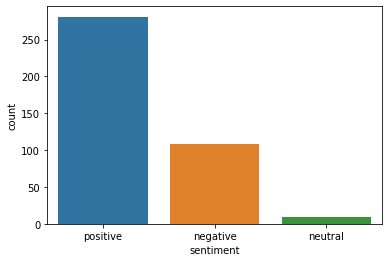

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['sentiment'],label="Count")
plt.show()

In [9]:
df.shape

(398, 2)

In [10]:
df.isnull().any()

reviews      False
sentiment    False
dtype: bool

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df.reviews).toarray()
labels = df.sentiment
features.shape

(398, 367)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['sentiment'], random_state = 100, test_size = 0.1)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [25]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB().fit(X_train_tfidf, y_train)
pred1 = clf1.predict(count_vect.transform(X_test))
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, pred1))
print("  ")

from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

Accuracy score:  0.85
  
              precision    recall  f1-score   support

    negative       1.00      0.60      0.75        10
     neutral       0.00      0.00      0.00         2
    positive       0.82      1.00      0.90        28

    accuracy                           0.85        40
   macro avg       0.61      0.53      0.55        40
weighted avg       0.83      0.85      0.82        40



array([[ 6,  0,  4],
       [ 0,  0,  2],
       [ 0,  0, 28]])

In [26]:
from sklearn.tree import DecisionTreeClassifier
mod2 = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
pred2 = mod2.predict(count_vect.transform(X_test))
print("Accuracy score: ", accuracy_score(y_test, pred2))
print("  ")
print(classification_report(y_test, pred2))

confusion_matrix(y_test, pred2)

Accuracy score:  0.7
  
              precision    recall  f1-score   support

    negative       0.55      0.60      0.57        10
     neutral       0.00      0.00      0.00         2
    positive       0.81      0.79      0.80        28

    accuracy                           0.70        40
   macro avg       0.45      0.46      0.46        40
weighted avg       0.71      0.70      0.70        40



array([[ 6,  0,  4],
       [ 1,  0,  1],
       [ 4,  2, 22]])

In [27]:
from sklearn import svm
mod3 = svm.SVC().fit(X_train_tfidf, y_train)
pred3 = mod3.predict(count_vect.transform(X_test))
print("Accuracy score: ", accuracy_score(y_test, pred3))
print("  ")
print(classification_report(y_test, pred3))

confusion_matrix(y_test, pred3)

Accuracy score:  0.75
  
              precision    recall  f1-score   support

    negative       1.00      0.20      0.33        10
     neutral       0.00      0.00      0.00         2
    positive       0.74      1.00      0.85        28

    accuracy                           0.75        40
   macro avg       0.58      0.40      0.39        40
weighted avg       0.77      0.75      0.68        40



array([[ 2,  0,  8],
       [ 0,  0,  2],
       [ 0,  0, 28]])

In [29]:
from sklearn.linear_model import SGDClassifier
clf4 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGDClassifier(max_iter=5)
mod4 = clf4.fit(X_train_tfidf, y_train)
pred4 = mod4.predict(count_vect.transform(X_test))
print("Accuracy score: ", accuracy_score(y_test, pred4))
print("  ")
print(classification_report(y_test, pred4))

confusion_matrix(y_test, pred4)

Accuracy score:  0.875
  
              precision    recall  f1-score   support

    negative       0.89      0.80      0.84        10
     neutral       0.00      0.00      0.00         2
    positive       0.87      0.96      0.92        28

    accuracy                           0.88        40
   macro avg       0.59      0.59      0.59        40
weighted avg       0.83      0.88      0.85        40



array([[ 8,  0,  2],
       [ 0,  0,  2],
       [ 1,  0, 27]])

In [30]:
from sklearn.neighbors import NearestCentroid
clf5 = NearestCentroid()
clf5.fit(X_train_tfidf, y_train)
pred5 = clf5.predict(count_vect.transform(X_test))
print("Accuracy score: ", accuracy_score(y_test, pred5))
print("  ")
print(classification_report(y_test, pred5))

confusion_matrix(y_test, pred5)

Accuracy score:  0.725
  
              precision    recall  f1-score   support

    negative       0.58      0.70      0.64        10
     neutral       0.00      0.00      0.00         2
    positive       0.88      0.79      0.83        28

    accuracy                           0.73        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.76      0.72      0.74        40



array([[ 7,  0,  3],
       [ 2,  0,  0],
       [ 3,  3, 22]])

In [22]:
from sklearn.linear_model import RidgeClassifier
clf6 = RidgeClassifier().fit(X_train_tfidf, y_train)
pred6 = clf6.predict(count_vect.transform(X_test))
print("Accuracy score: ", accuracy_score(y_test, pred6))
print("  ")
print(classification_report(y_test, pred6))

confusion_matrix(y_test, pred6)

Accuracy score:  0.875
  
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80        10
     neutral       0.00      0.00      0.00         2
    positive       0.90      0.96      0.93        28

    accuracy                           0.88        40
   macro avg       0.57      0.59      0.58        40
weighted avg       0.83      0.88      0.85        40



array([[ 8,  0,  2],
       [ 1,  0,  1],
       [ 1,  0, 27]])

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf7 = RandomForestClassifier(n_estimators=19)
clf7 = clf7.fit(X_train_tfidf, y_train)
pred7 = clf7.predict(count_vect.transform(X_test))
print("Accuracy score: ", accuracy_score(y_test, pred7))
print("  ")
print(classification_report(y_test, pred7))

confusion_matrix(y_test, pred7)

Accuracy score:  0.775
  
              precision    recall  f1-score   support

    negative       0.58      0.70      0.64        10
     neutral       0.00      0.00      0.00         2
    positive       0.86      0.86      0.86        28

    accuracy                           0.78        40
   macro avg       0.48      0.52      0.50        40
weighted avg       0.75      0.78      0.76        40



array([[ 7,  0,  3],
       [ 1,  0,  1],
       [ 4,  0, 24]])

In [29]:

content_list = df['reviews']

for content in content_list[:10]:
    print(content)
    
    print()

இந்த புத்தகம் உண்மையில் அதிக கவலை பிரச்சனை உள்ளவர்களுக்கு அவசியம். இந்த புத்தகம் நிலைமையை எவ்வாறு நிர்வகிப்பது மற்றும் நாம் எப்படி முடிவுகளை எடுக்க வேண்டும் என்பதை வெளிப்படுத்துகிறது. நீங்கள் அதற்கு செல்லலாம். பணத்திற்கு மதிப்பு.

தமிழில் நல்ல புத்தகம். அடிப்படை இதை கற்றுக்கொள்ள முடியும். ஆனால் இந்த புத்தகங்களில் விமர்சன நுண்ணறிவு இல்லை. புதியவர்களாக. முன்முயற்சி எடுத்த ஆசிரியருக்கு நன்றி.

சிறப்பான அறிமுகம்

அற்புதம்

அற்புதம்

நன்று

கதை முழுமையானதாக இல்லை என்றே தோன்றுகிறது

நா.முத்துக்குமார் அவர்கள் வெளியிட்ட முதல் கவிதை புத்தகம். அவரை அறிமுகம் செய்த 'தூர்' என்ற கவிதையும் இப்புத்தகத்தில் தான் உள்ளது. மிகச் சிறிய புத்தகம் தான். எளிய நடையிலேயே கவிதைகள் எழுதப்பட்டுள்ளன.

மூட்டை புத்தகம் கிடைத்தால் என்னையே விற்றாலும் விற்றுவிடுவார் என் அப்பா,.. மனதை தொட்ட வரிகள்..

நா. முத்துக்குமார் அவர்களின் மூன்றாவது புத்தகம் நான் படிப்பதில். சில வரிகளில் ஓராயிரம் உணர்வுகளை தரக்கூடியவர் இவர். ஒரு கிராமத்து கிரிக்கெட், பள்ளி, டென்த் ஏ காயத்ரி, தூர் இவை அனைத்தும் பிடித்தமான கவிதைகள். ஒவ்வொரு கவிதையின் 

In [30]:
print(clf.predict(count_vect.transform(["இல்லை"])))

['negative']
